                                EN3160 Assignment 1 on Intensity Transformations and Neighborhood
                                                        Filtering


Question 1

51
100
105
256


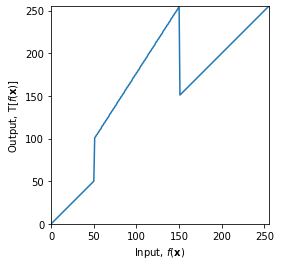

In [1]:
# Intensity Windowing

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


# Load and display the original image
img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Original Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Original Image", img_orig)
cv.waitKey(0)

# Apply the transformation and display the transformed image
image_transformed = cv.LUT(img_orig, transform)
cv.namedWindow("Transformed Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Transformed Image", image_transformed)
cv.waitKey(0)

# Close all windows
cv.destroyAllWindows()

Question 2

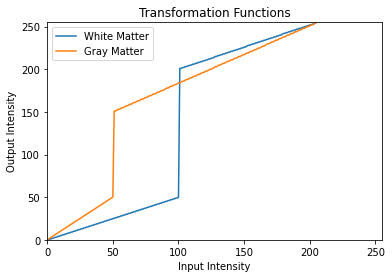

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\lut.cpp:368: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'cv::LUT'


: 

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image
img_orig = cv.imread('images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

# Define transformation parameters for white matter and gray matter
c_white_matter = np.array([(100, 50), (150, 200)])  # Example values for white matter
c_gray_matter = np.array([(50, 50), (100, 150)])   # Example values for gray matter

# Create transformation functions for white matter
t1_white_matter = np.linspace(0, c_white_matter[0, 1], c_white_matter[0, 0] + 1 - 0).astype('uint8')
t2_white_matter = np.linspace(c_white_matter[1, 1] + 1, 255, 255 - c_white_matter[1, 0]).astype('uint8')
transform_white_matter = np.concatenate((t1_white_matter, t2_white_matter), axis=0).astype('uint8')

# Create transformation functions for gray matter
t1_gray_matter = np.linspace(0, c_gray_matter[0, 1], c_gray_matter[0, 0] + 1 - 0).astype('uint8')
t2_gray_matter = np.linspace(c_gray_matter[1, 1] + 1, 255, 255 - c_gray_matter[1, 0]).astype('uint8')
transform_gray_matter = np.concatenate((t1_gray_matter, t2_gray_matter), axis=0).astype('uint8')


# Display transformation plots
fig, ax = plt.subplots()
ax.plot(transform_white_matter, label='White Matter')
ax.plot(transform_gray_matter, label='Gray Matter')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_title('Transformation Functions')
ax.legend()
plt.show()


# Display original image using OpenCV
cv.namedWindow("Original Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Original Image", img_orig)
cv.waitKey(0)

# Apply transformations using cv.LUT()
img_transformed_white_matter = cv.LUT(img_orig, transform_white_matter)
cv.namedWindow("White Matter Enhanced", cv.WINDOW_AUTOSIZE)
cv.imshow("White Matter Enhanced", img_transformed_white_matter)
cv.waitKey(0)

img_transformed_gray_matter = cv.LUT(img_orig, transform_gray_matter)
cv.namedWindow("Gray Matter Enhanced", cv.WINDOW_AUTOSIZE)
cv.imshow("Gray Matter Enhanced", img_transformed_gray_matter)
cv.waitKey(0)

cv.destroyAllWindows()

Question 3

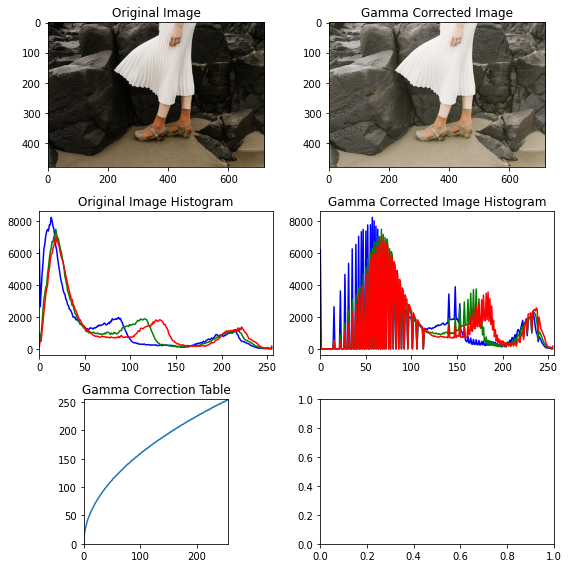

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_orig = cv.imread('images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

# Define gamma value
gamma = 2

# Create gamma correction table
table = np.array([(i / 255.0) ** (1.0 / gamma) * 255.0 for i in np.arange(0, 256)]).astype('uint8')

# Apply gamma correction using LUT
img_gamma = cv.LUT(img_orig, table)

# Convert BGR images to RGB for display
img_orig_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma_rgb = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

# Create subplots for displaying images and histograms
f, axarr = plt.subplots(3, 2, figsize=(8, 8))

# Display original and gamma-corrected images
axarr[0, 0].imshow(img_orig_rgb)
axarr[0, 0].set_title('Original Image')
axarr[0, 1].imshow(img_gamma_rgb)
axarr[0, 1].set_title('Gamma Corrected Image')

# Plot histograms for original and gamma-corrected images
color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[1, 0].set_title('Original Image Histogram')
axarr[1, 0].set_xlim([0, 256])
axarr[1, 1].set_title('Gamma Corrected Image Histogram')
axarr[1, 1].set_xlim([0, 256])

# Plot the gamma correction table
axarr[2, 0].plot(table)
axarr[2, 0].set_title('Gamma Correction Table')
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
